2-1. 프로젝트 1 : 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!

(1) 데이터 가져오기
sklearn.datasets의 load_diabetes에서 데이터를 가져와주세요.
diabetes의 data를 df_X에, target을 df_y에 저장해주세요.

In [1]:
from sklearn.datasets import load_diabetes

diabetes=load_diabetes()

df_X=diabetes.data
df_y=diabetes.target

(2) 모델에 입력할 데이터 X 준비하기
df_X에 있는 값들을 numpy array로 변환해서 저장해주세요.

In [2]:
print(df_X.shape)
#df_X=np.delete(df_X, 1 , axis = 1)
#df_X=np.delete(df_X, 7 , axis = 1)
print(df_X.shape)
print(df_y.shape)
print(type(df_X))
print(diabetes.feature_names)
print(diabetes.DESCR)#feature 설명

(442, 10)
(442, 10)
(442,)
<class 'numpy.ndarray'>
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s

In [3]:
import pandas as pd

(3) 모델에 예측할 데이터 y 준비하기
df_y에 있는 값들을 numpy array로 변환해서 저장해주세요.

In [4]:
import numpy as np
df_X=np.array(df_X)
print(type(df_X))
df_y=np.array(df_y)

<class 'numpy.ndarray'>


(4) train 데이터와 test 데이터로 분리하기
X와 y 데이터를 각각 train 데이터와 test 데이터로 분리해주세요.

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=42)
print(X_train.shape,X_test.shape)

(353, 10) (89, 10)


(5) 모델 준비하기
입력 데이터 개수에 맞는 가중치 W와 b를 준비해주세요.
모델 함수를 구현해주세요.

In [6]:
w = np.random.rand(len(X_train[0,:]))
b = np.random.rand()
def model(w,b,x):
    return x@w+b

(6) 손실함수 loss 정의하기
손실함수를 MSE 함수로 정의해주세요.

In [7]:
def loss(x,w,b,y):
    pred=model(w,b,x)
    return ((y - pred) ** 2).mean()

(7) 기울기를 구하는 gradient 함수 구현하기
기울기를 계산하는 gradient 함수를 구현해주세요.

In [8]:
def gradient(x, w, b, y):
    #dw = (loss(x, w + 0.0001, b, y) - loss(x, w, b, y)) / 0.0001
    #db = (loss(x, w, b + 0.0001, y) - loss(x, w, b, y)) / 0.0001
    N = len(y)
    
    # y_pred 준비
    y_pred = model(w, b, x)
    
    # 공식에 맞게 gradient 계산
    dw = 1/N * 2 * x.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dw, db

(8) 하이퍼 파라미터인 학습률 설정하기
학습률, learning rate 를 설정해주세요
만약 학습이 잘 되지 않는다면 learning rate 값을 한번 여러 가지로 설정하며 실험해 보세요.

In [9]:
lr=0.01
def train_step(x,w,b,y):
    dw,db=gradient(x, w, b, y)
    w-=lr*dw
    b-=lr*db
    return w,b

(9) 모델 학습하기
정의된 손실함수와 기울기 함수로 모델을 학습해주세요.
loss값이 충분히 떨어질 때까지 학습을 진행해주세요.
입력하는 데이터인 X에 들어가는 특성 컬럼들을 몇 개 빼도 괜찮습니다. 다양한 데이터로 실험해 보세요.

In [10]:
for i in range(60000):
    w,b=train_step(X_train,w,b,y_train)
    if i%5000==0:
        print("LossValue={0}".format(loss(X_train,w,b,y_train)))
    

LossValue=28715.2482169217
LossValue=4006.9226901050856
LossValue=3443.2895871076994
LossValue=3214.6743536715226
LossValue=3094.0613578536913
LossValue=3022.8881791500444
LossValue=2979.031593150365
LossValue=2951.4163230586046
LossValue=2933.7477546858545
LossValue=2922.272740989557
LossValue=2914.705497671744
LossValue=2909.6348864489555


(10) test 데이터에 대한 성능 확인하기
test 데이터에 대한 성능을 확인해주세요.

In [11]:
prediction = model(w, b, X_test)
mse = loss(X_test, w, b, y_test)
mse

2870.676281593953

(11) 정답 데이터와 예측한 데이터 시각화하기

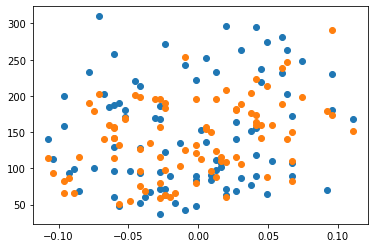

In [12]:
import matplotlib.pyplot as plt
plt.scatter(X_test[:,0], y_test)
plt.scatter(X_test[:,0], prediction)
plt.show()

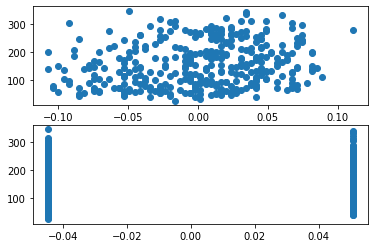

In [13]:
prediction = model(w, b, X_train)
plt.subplot(211)
plt.scatter(X_train[:,0], y_train)
plt.subplot(212)
plt.scatter(X_train[:,1], y_train)

plt.show()

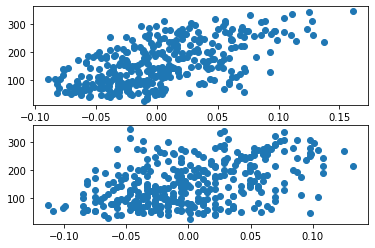

In [14]:
plt.subplot(211)
plt.scatter(X_train[:,2], y_train)
plt.subplot(212)
plt.scatter(X_train[:,3], y_train)
plt.show()

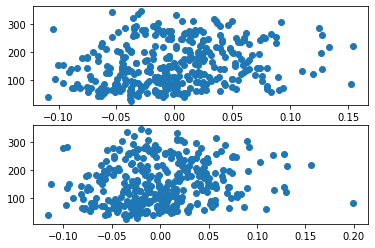

In [15]:
plt.subplot(211)
plt.scatter(X_train[:,4], y_train)
plt.subplot(212)
plt.scatter(X_train[:,5], y_train)
plt.show()

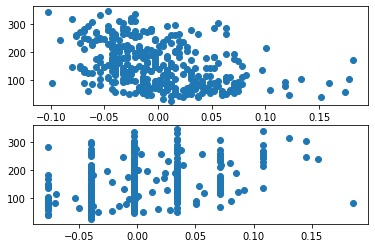

In [16]:
plt.subplot(211)
plt.scatter(X_train[:,6], y_train)
plt.subplot(212)
plt.scatter(X_train[:,7], y_train)
plt.show()

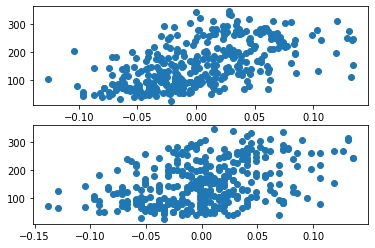

In [17]:
plt.subplot(211)
plt.scatter(X_train[:,8], y_train)
plt.subplot(212)
plt.scatter(X_train[:,9], y_train)
plt.show()